['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']


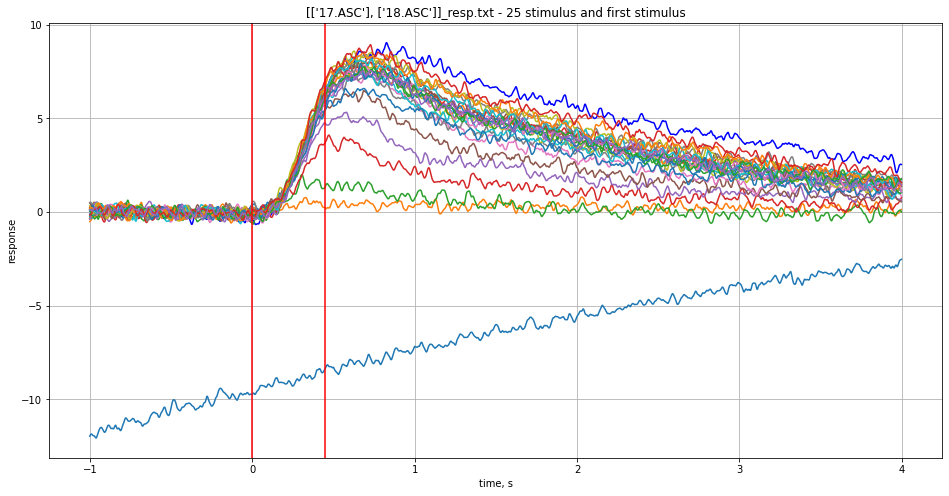

In [85]:
#v. 20221222.1
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, optimize


input_dir = "./rising-phase/"
filename = "[['17.ASC'], ['18.ASC']]_resp.txt"
fs = 500
prefix = 1
left = 0
right = 0.45
stims_to_fit = [2, 3, 24]   # номера стимулов для сравнения с эталонным (пример: [1, 24])

with open(input_dir + filename, 'r', encoding='utf-8') as file:
    line = file.readline()
    while line and line[0:4] != 'time':
        line = file.readline()
    indexes = line.rstrip().split('\t')[2:]
    line = file.readline().rstrip()
    nums = line.split('\t')
    t = []
    vs = [float(num) for num in nums[1:]]
    stims_cnt = len(vs)
    stims = [[] for i in range(stims_cnt)]
    while line:
        t.append(float(nums[0]))
        for i in range(stims_cnt):
            stims[i].append(vs[i])
        line = file.readline().rstrip()
        if line:
            nums = line.split('\t')
            if not nums[1]:
                break
            vs = [float(num) for num in nums[1:]]

t = np.array(t)
for i in range(stims_cnt):
    stims[i] = np.array(stims[i])
first_stim = stims[0]
stims.pop(0)
stims_cnt -= 1
print(indexes)
stims = {int(indexes[i]): stims[i] for i in range(stims_cnt)}


fig, ax = plt.subplots()
ax.plot(t, first_stim, 'b')
for stim in stims.values():
    ax.plot(t, stim)
ax.axvline(x=left, color = 'r')
ax.axvline(x=right, color = 'r')
fig.set_figwidth(16)
fig.set_figheight(8)
ax.set_title(f'{filename} - {stims_cnt} stimulus and first stimulus')
ax.set_xlabel('time, s')
ax.set_ylabel('response')
ax.grid()

stim	a
2	2.995
3	1.603
24	1.013


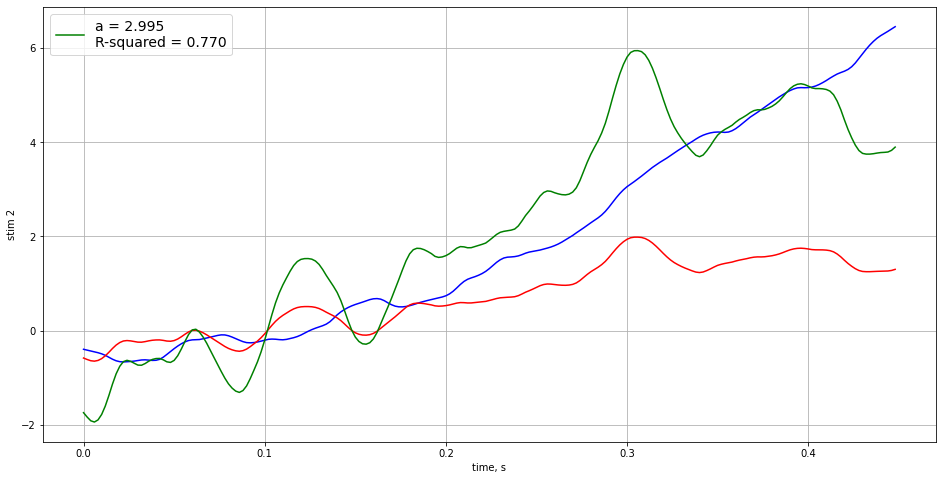

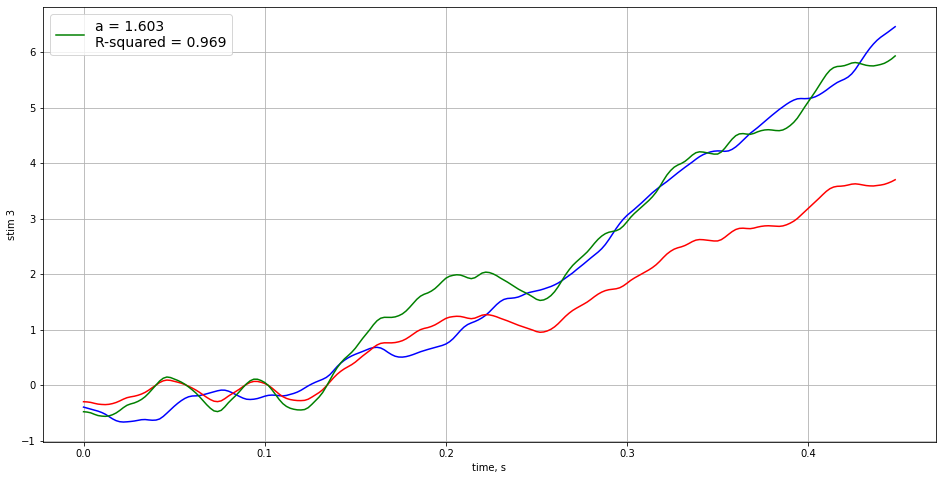

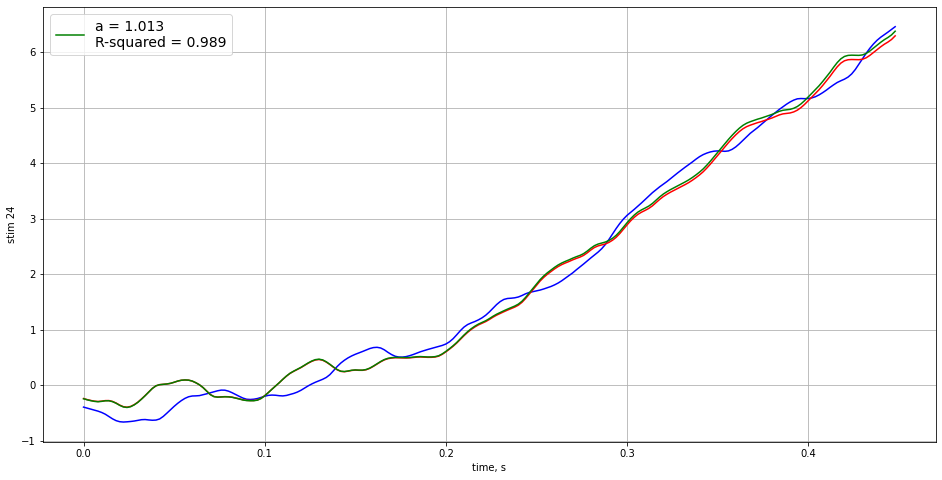

In [86]:
left = round(prefix * fs + left * fs)
right = round(prefix * fs + right * fs)
etalon = first_stim[left:right]
t = t[left:right]
def func(t, a):
    return etalon / a

print('stim\ta')
for i in stims_to_fit:
    y = stims[i][left:right]
    popt, pcov = optimize.curve_fit(func, t, y, [1])
    a = popt[0]
    rvalue = stats.linregress(etalon, a * y).rvalue
    print(f'{i}\t{a:.3f}')
    fig, ax = plt.subplots()
    ax.plot(t, etalon, 'b')
    ax.plot(t, y, 'r')
    ax.plot(t, a * y, 'g', label=f'a = {a:.3f}\n'
                            f'R-squared = {rvalue ** 2:.3f}')
    fig.set_figwidth(16)
    fig.set_figheight(8)
    ax.set_xlabel('time, s')
    ax.set_ylabel(f'stim {i}')
    ax.legend(prop={"size": 14})
    ax.grid()